In [1]:
import numpy as np
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Conv1D, MaxPooling1D
from keras.models import load_model
import os
import tensorflow as tf
import time
import datetime
import csv
from scipy.optimize import curve_fit    # フィッティング用
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE' #意味はわからん
date = str(datetime.date.today())
save_predict = "/Users/nagaiyuma/Desktop/maindata/"+str(date)+"-predict.csv"
save_test = "/Users/nagaiyuma/Desktop/maindata/"+str(date)+"-test.csv"
print(date)

Using TensorFlow backend.


2020-10-28


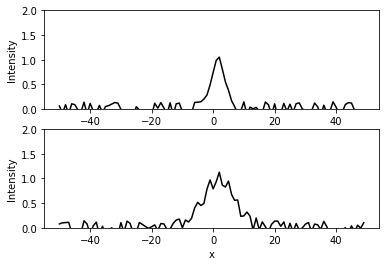

0.9939941779959037
1.6053244467382182
4.594461369439943
0.009513968140070852
0.9596461970488911
1.811269638527084
10.474219138788962
0.008352358247424904


In [13]:
#ガウス関数の動作確認
i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 10.0
h0 = 0.0
# ガウシアンビームの関数の定義
def gaussian_beam(x,a,b,c,d):
    return  a * np.exp(-2*(x-b)*(x-b)/c/c) + d

param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param_ini_y = np.array([i0, y0, w0, h0])
# x配列とy配列
x_array = np.arange(-50, 50, 1.0)                         # x配列
y_array = np.arange(-50, 50, 1.0)                         # y配列
nx = len(x_array)
ny = len(y_array)
intensity1 = np.zeros((nx, ny))                            # ノイズを含まない2次元強度分布

for i in range(nx):
    for j in range(ny):
        intensity1[i][j] = i0 * np.exp(-2*((x_array[i]-x0)*(x_array[i]-x0) + (y_array[j]-y0)*(y_array[j]-y0))/w0/w0)

profile_y_1 = np.zeros(ny)

# 2次元の強度分布にノイズを付与
noise = (np.random.rand(nx*ny)-0.5)*i0*NOISE*0.01   #プラスマイナスNOISE%のノイズ(一様分布), (np.random.rand(nx*ny)-0.5)*2の部分が-1から1までの乱数になる
noise = noise.reshape((nx,ny))
intensity_noise = intensity2 + noise

# 最大値の探索 & その位置の強度プロファイルの取得
idx = np.unravel_index(np.argmax(intensity_noise), intensity_noise.shape)
profile_y_1 = intensity_noise[idx[0],:]


x0 = 2.0
y0 = 2.0
# x配列とy配列
x_array = np.arange(-50, 50, 1.0)                         # x配列
y_array = np.arange(-50, 50, 1.0)                         # y配列
nx = len(x_array)
ny = len(y_array)
intensity2 = np.zeros((nx, ny))       # ノイズを含まない2次元強度分布


for i in range(nx):
    for j in range(ny):
        intensity2[i][j] = i0 * np.exp(-2*((x_array[i]-x0)*(x_array[i]-x0) + (y_array[j]-y0)*(y_array[j]-y0))/w0/w0)

profile_y_2 = np.zeros(ny)

# 2次元の強度分布にノイズを付与
noise = (np.random.rand(nx*ny)-0.5)*i0*NOISE*0.01   #プラスマイナスNOISE%のノイズ(一様分布), (np.random.rand(nx*ny)-0.5)*2の部分が-1から1までの乱数になる
noise = noise.reshape((nx,ny))
intensity_noise = intensity2 + noise

# 最大値の探索 & その位置の強度プロファイルの取得
idx = np.unravel_index(np.argmax(intensity_noise), intensity_noise.shape)
profile_y_2 = intensity_noise[idx[0],:]

NOISE = 30

plt.subplot(2,1,1)
plt.plot(x_array, profile_y_1,  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity')
plt.ylim(0.0, 2.0)      # y軸の表示範囲
plt.subplot(2,1,2)
plt.plot(x_array, profile_y_2,  color="black", label = 'x0 = 0.0')
plt.xlabel('y')          # 軸ラベル
plt.ylabel('Intensity')
plt.ylim(0.0, 2.0)
plt.show()
plt.close()


# プロファイルの非線形フィッティング
param, cov  = curve_fit(gaussian_beam, x_array, profile_y_1, p0=param_ini_x, maxfev=2000)
print(param[0])
print(param[1])
print(param[2])
print(param[3])

param, cov  = curve_fit(gaussian_beam, x_array, profile_y_2, p0=param_ini_y, maxfev=2000)
print(param[0])
print(param[1])
print(param[2])
print(param[3])

In [2]:
train_num = 10000 #訓練データの数
test_num = 1000 #テストデータの数
data_size = 100 #配列の大きさ

x_train = np.zeros((train_num,data_size))
t_train = np.zeros(train_num)
x_test = np.zeros((test_num,data_size))
t_test = np.zeros(test_num)

In [2]:
#csvファイルに変換したデータを学習する
data_py_path = "/Users/nagaiyuma/Desktop/maindata/201016/noise30%/2020-10-16"

In [3]:
with open(data_py_path + "x_train.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    x_train = np.array([row for row in reader])
    
with open(data_py_path + "x_test.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    x_test = np.array([row for row in reader])
    
with open(data_py_path + "t_train.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    t_train = np.array([row for row in reader])
    
with open(data_py_path + "t_test.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    t_test = np.array([row for row in reader])
    
t_train = t_train.T[1].flatten()
t_test = t_test.T[1].flatten()

In [5]:
#全結合層のみの実装
batch_size = 200  # 訓練データを128ずつのデータに分けて学習させる
epochs = 50 # 訓練データを繰り返し学習させる数

# モデルの作成
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(100,)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

model.compile(loss='mse',
 optimizer=RMSprop(),
 metrics=['mae'])



# 学習は、scrkit-learnと同様fitで記述できる
history = model.fit(x_train, t_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(x_test, t_test))

# 評価はevaluateで行う
score = model.evaluate(x_test, t_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#modelの保存
save_model_path = "/Users/nagaiyuma/Desktop/maindata/"+date+"-dnc1.h5"
model.save(save_model_path)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 20,301
Trainable params: 20,301
Non-trainable params: 0
_________________________________________________________________

Train on 10000 samples, validate on 1000 samples
Epoch 1/50
10000/10000 [==============================] - 2s 156us

0.13025147199929354 0.09782692975707648


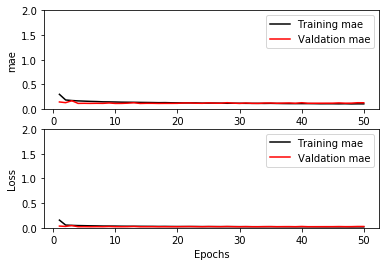

In [6]:
abs_error = abs(np.array(model.predict(x_test).flatten()- t_test))
ave_abs = np.average(abs_error)
std_abs = np.std(abs_error)
print(ave_abs, std_abs)

N = 1000
NOISE = 30
#損失関数とmaeの推移
savename = date+"-dnc1_noise%d_N%d.png" % (NOISE, N)
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)

plt.subplot(2,1,1)
plt.plot(epochs, mae,  color="black", label = 'Training mae')
plt.plot(epochs, val_mae,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('mae')
plt.ylim(0.0, 2.0)      # y軸の表示範囲
plt.subplot(2,1,2)
plt.plot(epochs, loss,  color="black", label = 'Training mae')
plt.plot(epochs, val_loss,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('Loss')
plt.ylim(0.0, 2.0)
plt.savefig(savename) # png画像として出力
plt.show()
plt.close()

In [1]:
#まともなCNNの実装
batch_size = 200  # 訓練データを200ずつのデータに分けて学習させる
epochs = 50 # 訓練データを繰り返し学習させる数

#データ形式の変更(シーケンス長, パラメータ数)
train_x = x_train.reshape(-1, 100, 1)
train_t = t_train
test_x = x_test.reshape(-1, 100, 1)
test_t = t_test

model = Sequential()
model.add(Conv1D(50, 3, padding='same', input_shape=(100, 1), activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(50, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(5, padding='same'))
model.add(Conv1D(10, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu', kernel_initializer="he_normal"))

model.summary()

model.compile(loss='mse',
 optimizer='adam',
 metrics=['mae'])

callbacks = [keras.callbacks.TensorBoard(log_dir='./logs',
                            histogram_freq=1, 
                            batch_size=batch_size, 
                            write_graph=True, 
                            write_grads=True)]

history = model.fit(train_x, train_t,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(test_x, test_t),
 callbacks=callbacks)

score = model.evaluate(test_x, test_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#modelの保存
save_model_path = "/Users/nagaiyuma/Desktop/maindata/"+date+"-cnn1.h5"
model.save(save_model_path)

NameError: name 'x_train' is not defined

0.10957388364076907 0.08941770849353284


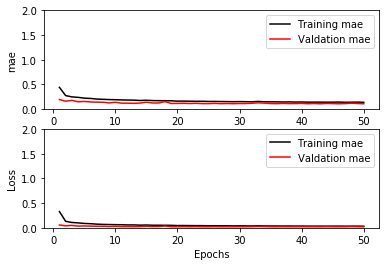

In [9]:
abs_error = abs(np.array(model.predict(test_x).flatten()- t_test))
ave_abs = np.average(abs_error)
std_abs = np.std(abs_error)
print(ave_abs, std_abs)

#損失関数とmaeの推移
savename = date+"-cnn1_noise%d_N%d_1.png" % (NOISE, N)
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)

plt.subplot(2,1,1)
plt.plot(epochs, mae,  color="black", label = 'Training mae')
plt.plot(epochs, val_mae,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('mae')
plt.ylim(0.0, 2.0)      # y軸の表示範囲
plt.subplot(2,1,2)
plt.plot(epochs, loss,  color="black", label = 'Training mae')
plt.plot(epochs, val_loss,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('Loss')
plt.ylim(0.0, 2.0)
plt.savefig(savename) # png画像として出力
plt.show()
plt.close()

In [10]:
#3出力に戻す
with open(data_py_path + "t_train.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    t_train = np.array([row for row in reader])
    
with open(data_py_path + "t_test.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    t_test = np.array([row for row in reader])

In [11]:
#全結合層のみの実装
batch_size = 200  # 訓練データを128ずつのデータに分けて学習させる
epochs = 50 # 訓練データを繰り返し学習させる数

# モデルの作成
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(100,)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3))

model.summary()

model.compile(loss='mse',
 optimizer=RMSprop(),
 metrics=['mae'])

# 学習は、scrkit-learnと同様fitで記述できる
history = model.fit(x_train, t_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(x_test, t_test))

# 評価はevaluateで行う
score = model.evaluate(x_test, t_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#modelの保存
save_model_path = "/Users/nagaiyuma/Desktop/maindata/"+date+"-dnc3.h5"
model.save(save_model_path)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 303       
Total params: 20,503
Trainable params: 20,503
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 1000 samples
Epoch 1/50
10000/10000 [==============================] - 2s 179us/

In [ ]:
abs_error = abs(np.array(model.predict(x_test).T[1].flatten()- t_test.T[1].flatten()))
ave_abs = np.average(abs_error)
std_abs = np.std(abs_error)
print(ave_abs, std_abs)

N = 1000
NOISE = 30
#損失関数とmaeの推移
savename = "201014_dnc3_noise%d_N%d.png" % (NOISE, N)
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)

plt.subplot(2,1,1)
plt.plot(epochs, mae,  color="black", label = 'Training mae')
plt.plot(epochs, val_mae,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('mae')
plt.ylim(0.0, 2.0)      # y軸の表示範囲
plt.subplot(2,1,2)
plt.plot(epochs, loss,  color="black", label = 'Training mae')
plt.plot(epochs, val_loss,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('Loss')
plt.ylim(0.0, 2.0)
plt.savefig(savename) # png画像として出力
plt.show()
plt.close()

In [ ]:
#まともなCNN3の実装
batch_size = 200  # 訓練データを200ずつのデータに分けて学習させる
epochs = 50 # 訓練データを繰り返し学習させる数

#データ形式の変更(シーケンス長, パラメータ数)
train_x = x_train.reshape(-1, 100, 1)
train_t = tx_train
test_x = x_test.reshape(-1, 100, 1)
test_t = tx_test

model = Sequential()
model.add(Conv1D(50, 3, padding='same', input_shape=(100, 1), activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(50, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(5, padding='same'))
model.add(Conv1D(10, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu', kernel_initializer="he_normal"))

model.summary()

model.compile(loss='mse',
 optimizer='adam',
 metrics=['mae'])


callbacks = [tf.keras.callbacks.TensorBoard(log_dir='my_log_dir', 
                                         histogram_freq=1, 
                                         embeddings_freq=1)]

history = model.fit(train_x, train_t,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(test_x, test_t),
 callbacks=callbacks)

score = model.evaluate(test_x, test_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#modelの保存
save_model_path = "/Users/nagaiyuma/Desktop/maindata/"+date+"-cnn3.h5"
model.save(save_model_path)

In [ ]:
abs_error = abs(np.array(model.predict(test_x).flatten()- t_test))
ave_abs = np.average(abs_error)
std_abs = np.std(abs_error)
print(ave_abs, std_abs)

#損失関数とmaeの推移
savename = date +"-cnn3_noise%d_N%d_1.png" % (NOISE, N)
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)

plt.subplot(2,1,1)
plt.plot(epochs, mae,  color="black", label = 'Training mae')
plt.plot(epochs, val_mae,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('mae')
plt.ylim(0.0, 2.0)      # y軸の表示範囲
plt.subplot(2,1,2)
plt.plot(epochs, loss,  color="black", label = 'Training mae')
plt.plot(epochs, val_loss,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('Loss')
plt.ylim(0.0, 2.0)
plt.show()
plt.savefig(savename) # png画像として出力
plt.close()

In [ ]:
t_predict = model.predict(x_test).T[1].flatten()
t_test = t_test.T[1].flatten()

with open(save_predict,'w') as f:
    writer = csv.writer(f)
    writer.writerow(t_predict)

with open(save_test,'w') as f:
    writer = csv.writer(f)
    writer.writerow(t_test)